# Notebook Summary

The aim of the project is use features given to determine if the listed job is fake or not. There are a lot of listings of fake jobs that lead to monetary and data scams. A system is needed to determine if a job listing is real or fake.

Libraries used are: pandas, numpy, matplotlib, seaborn, sklearn.

Explanation:
1. The dataset originally has 17880 rows and 18 colummns with combination of float, int and string data types for features.
2. The target variable is fraudulent. A value of '1' indicates that the job listing is fake and a value of '0' indicates that the job listing is real.
3. The dataset is highly imbalanced mostly full with non fraudulent jobs. The dataset is balanced equally with both target variable values.
4. All columns of dataset include 'job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', and'fraudulent'.
5. All the columns which have multiple categories and won't be effective in modelling are droppped.
6. All the columns are checked for the number of null values and most of them are dropped if the number of null values are high (More than 600 amongst 1732 rows).
7. The dataset is split into training and test dataframes using sklearn's train_test_split
8. The models trained are:
* K nearest neighbors model with neighbor values from 1 to 10
* Logistic regression model
* Linear support vector machine classifier with penalties as 'l1' and 'l2' and multiple class values as 'ovr' and 'crammer_singer'
* Kernelized support vector machine classifier with regularization parameters as 0.01, 0.1, 1 and 10, kernels as 'linear', 'poly', 'rbf' and 'sigmoid', and degrees of 'poly' as 2, 3, 4, and 5.
* Decision tree classifiers with criterion as 'gini' and 'entropy' and max depths from 1 to 8
9. The metric for comparing models is accuracy score. The model with highest accuracy score is considered the best for classification task for this dataset

###### Decision Tree classifier with 'Gini' criterion and 5 as maximum depth performs best with accuracy score of 0.730337
###### For project 1 the text columns are not used. These will be processed in project 2 using neural networks


### Importing Libraries

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### Data Processing

In [2]:
df = pd.read_csv("fake_job_postings.csv")

In [3]:
df.shape

(17880, 18)

In [4]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [5]:
df.fraudulent

0        0
1        0
2        0
3        0
4        0
        ..
17875    0
17876    0
17877    0
17878    0
17879    0
Name: fraudulent, Length: 17880, dtype: int64

#### Fraudulent is the target variable

In [6]:
df.fraudulent.unique()

array([0, 1], dtype=int64)

In [7]:
df.fraudulent.nunique()

2

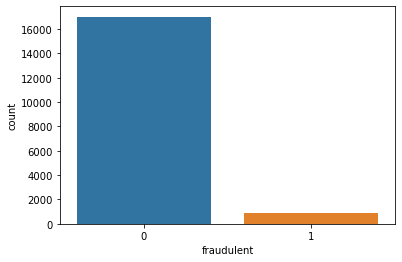

In [8]:
sns.countplot(df.fraudulent)

In [9]:
df[df.fraudulent == 1].shape

(866, 18)

#### Balancing dataset

In [10]:
target_one = df[df.fraudulent == 1]
target_zero = shuffle(df[df.fraudulent == 0]).iloc[:target_one.shape[0]]

In [11]:
print(target_one.shape)
print(target_zero.shape)

(866, 18)
(866, 18)


In [12]:
df = target_one.append(target_zero)

In [13]:
df.shape

(1732, 18)

In [14]:
df = shuffle(df)

In [15]:
df.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17813,17814,Customer Service Representative,"US, PA, Philadelphia",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1
17757,17758,RECEPTIONIST / DATA ENTRY / OFFICE CLERK,"US, IL, CHICAGO",NaN,NaN,NaN,is seeking to hire a full time Data Entry/Cler...,QUALIFICATIONS:** Professional Phone Skills** ...,BENEFITS:SalaryMedical InsuranceProfit Sharing...,0,0,0,Full-time,Entry level,NaN,Accounting,Administrative,1
4578,4579,Service Associate,"US, TX, Arlington",Financial Dept,28000-35000,The Accion story began more than 100 years ag...,"Welcome and greet customers, modeling a...",...,"401K, HEALTH CARE PLAN , DENTAL , LIFE INSURAN...",0,1,1,Full-time,Entry level,High School or equivalent,Financial Services,NaN,1
7570,7571,Production Assistant,"US, TX, Houston",NaN,30000-34000,"Founded in 1993, our group has, in a few short...","Operate machine tools such as lathes, milling ...",Flexible ScheduleNo professional knowledge re...,compensation: 11.50/hr plus growth potential,0,1,1,Full-time,Not Applicable,Unspecified,Media Production,Manufacturing,1
7296,7297,Technical Support Agent - Software,"US, CA, San Francisco",Business Operations,NaN,Flite delivers ad innovation at scale to the w...,"We are looking for an experienced, process-ori...",Required:2+ Years working in client support / ...,Competitive baseAttractive stock option planMe...,0,1,0,Full-time,Associate,NaN,Computer Software,Customer Service,0


#### Exploring all the columns

In [16]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000
mean,9928.155889,0.061778,0.560624,0.380485,0.500000
std,5680.971596,0.240822,0.496455,0.485646,0.500144
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,5361.000000,0.000000,0.000000,0.000000,0.000000
50%,9156.000000,0.000000,1.000000,0.000000,0.500000
75%,15967.000000,0.000000,1.000000,1.000000,1.000000
max,17866.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732 entries, 17813 to 17670
Data columns (total 18 columns):
job_id                 1732 non-null int64
title                  1732 non-null object
location               1693 non-null object
department             633 non-null object
salary_range           332 non-null object
company_profile        981 non-null object
description            1731 non-null object
requirements           1443 non-null object
benefits               1007 non-null object
telecommuting          1732 non-null int64
has_company_logo       1732 non-null int64
has_questions          1732 non-null int64
employment_type        1332 non-null object
required_experience    964 non-null object
required_education     882 non-null object
industry               1221 non-null object
function               1075 non-null object
fraudulent             1732 non-null int64
dtypes: int64(5), object(13)
memory usage: 257.1+ KB


#### Checking amount of null values

In [18]:
for col in df.columns:
    series = df[col]
    type_set = set(type(i) for i in series)
    print("{0}: {1}".format(col,type_set))

job_id: {<class 'int'>}
title: {<class 'str'>}
location: {<class 'str'>, <class 'float'>}
department: {<class 'str'>, <class 'float'>}
salary_range: {<class 'str'>, <class 'float'>}
company_profile: {<class 'str'>, <class 'float'>}
description: {<class 'str'>, <class 'float'>}
requirements: {<class 'str'>, <class 'float'>}
benefits: {<class 'str'>, <class 'float'>}
telecommuting: {<class 'int'>}
has_company_logo: {<class 'int'>}
has_questions: {<class 'int'>}
employment_type: {<class 'str'>, <class 'float'>}
required_experience: {<class 'str'>, <class 'float'>}
required_education: {<class 'str'>, <class 'float'>}
industry: {<class 'str'>, <class 'float'>}
function: {<class 'str'>, <class 'float'>}
fraudulent: {<class 'int'>}


In [19]:
for col in df.columns:
    null_val = df[col].isna().sum()
    null_val = format(null_val/df.shape[0],'.2f')
    print("{0}: {1}% null values".format(col,null_val))

job_id: 0.00% null values
title: 0.00% null values
location: 0.02% null values
department: 0.63% null values
salary_range: 0.81% null values
company_profile: 0.43% null values
description: 0.00% null values
requirements: 0.17% null values
benefits: 0.42% null values
telecommuting: 0.00% null values
has_company_logo: 0.00% null values
has_questions: 0.00% null values
employment_type: 0.23% null values
required_experience: 0.44% null values
required_education: 0.49% null values
industry: 0.30% null values
function: 0.38% null values
fraudulent: 0.00% null values


#### Columnwise exploration

In [20]:
print(df.columns)

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


In [21]:
one = df[df.fraudulent == 1]
zero = df[df.fraudulent == 0]

In [22]:
df.job_id

17813    17814
17757    17758
4578      4579
7570      7571
7296      7297
         ...  
2816      2817
493        494
17399    17400
15472    15473
17670    17671
Name: job_id, Length: 1732, dtype: int64

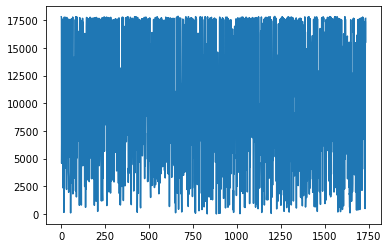

In [23]:
x = range(1,len(df.job_id)+1)
y = df.job_id
plt.plot(x,y)

In [24]:
print(df.job_id.isna().sum())

0


In [25]:
print(one.job_id.isna().sum()/one.shape[0])
print(zero.job_id.isna().sum()/zero.shape[0])

0.0
0.0


In [26]:
df.title

17813             Customer Service Representative
17757    RECEPTIONIST / DATA ENTRY / OFFICE CLERK
4578                            Service Associate
7570                         Production Assistant
7296           Technical Support Agent - Software
                           ...                   
2816                           IT PM (April 2014)
493                Admin Assistant/ Receptionist 
17399    WEEKLY JOBS, Part Time Workers Required.
15472          Compliance & Controls Coordinator 
17670                      Customer Service Agent
Name: title, Length: 1732, dtype: object

In [27]:
df.title.isna().sum()

0

In [28]:
print(one.title.isna().sum()/one.shape[0])
print(zero.title.isna().sum()/zero.shape[0])

0.0
0.0


In [29]:
df.department

17813       Customer Service
17757                    NaN
4578          Financial Dept
7570                     NaN
7296     Business Operations
                ...         
2816                     NaN
493                      NaN
17399                    NaN
15472                finance
17670                    NaN
Name: department, Length: 1732, dtype: object

In [30]:
df.department.unique()

array(['Customer Service', nan, 'Financial Dept', 'Business Operations',
       'Administrative', 'IT Administrator / Developer', 'Infrastructure',
       'Development', 'Maintenance', 'Operations', 'tech', 'Oil & Energy',
       'MainSup', 'Writing', 'IT', 'Information Technology', 'Sales',
       'Clerical', 'Texas Home Health', 'IAASARS', 'Product Development',
       'Client Services ', 'Account/finance', 'Sales and Marketing ',
       'Account', 'Management', 'User Experience', 'Human Resources',
       'Marketing', 'Commercial Management / Contract Management',
       'Software Development', 'MAINT', 'Product', 'Media', 'Tech',
       'Digital', 'Financial Services', 'Business:Market Analysis',
       'Information Technology ', 'Engineering',
       'Engineering, Pipeline Design', 'Controls Engineer', 'admin',
       'OptionsAway', 'Department', 'PMO', 'biotech', 'Admin - Clerical',
       'COMPLIANCE UNIT 701', 'Technician', 'Accounting/Payroll',
       'Finance team', 'Financia

In [31]:
df.department.isna().sum()

1099

In [32]:
print(one.department.isna().sum()/one.shape[0])
print(zero.department.isna().sum()/zero.shape[0])

0.6131639722863741
0.6558891454965358


In [33]:
df['salary_range']

17813    30000-50000
17757            NaN
4578     28000-35000
7570     30000-34000
7296             NaN
            ...     
2816             NaN
493      23040-28800
17399            NaN
15472            NaN
17670            NaN
Name: salary_range, Length: 1732, dtype: object

In [34]:
df['salary_range'].unique()

array(['30000-50000', nan, '28000-35000', '30000-34000', '21-63000',
       '22000-28000', '10000-14000', '30000-100000', '25000-35000',
       '65000-80000', '55000-68000', '2000-2000', '40000-65000', '0-0',
       '95000-115000', '65000-75000', '26000-30000', '15400-19600',
       '1000-2000', '50000-60000', '35000-40000', '30000-40000',
       '23000-28000', '60000-100000', '80000-120000', '250000-500000',
       '2000000-2263000', '1000-5000', '2500-5000', '6266624-8582080',
       '15-19', '10000-250000', '65000-85000', '30000-35000',
       '55000-65000', '13-20', '60000-90000', '75000-100000',
       '48000-55000', '16000-18500', '110000-125000', '35000-45000',
       '18000-30000', '90000-100000', '27000-32000', '80000-200000',
       '80-100', '20000-20000', '9000-10000', '30000-38000',
       '28000-38000', '70000-90000', '40000-45000', '45-48', '55-65',
       '120000-125000', '40000-90000', '18000-20000', '23000-32000',
       '25000-30000', '5500-5500', '2000-4000', '0-343

In [35]:
df['salary_range'].isna().sum()

1400

In [36]:
print(one.salary_range.isna().sum()/one.shape[0])
print(zero.salary_range.isna().sum()/zero.shape[0])

0.7424942263279446
0.874133949191686


In [37]:
df['company_profile']

17813    Gary Cartwright established Cartwright Propert...
17757                                                  NaN
4578     The Accion  story began more than 100 years ag...
7570     Founded in 1993, our group has, in a few short...
7296     Flite delivers ad innovation at scale to the w...
                               ...                        
2816     Retailers around the world are constantly work...
493                                                    NaN
17399                                                  NaN
15472    Optimal Business Action was created in 2005 in...
17670                                                  NaN
Name: company_profile, Length: 1732, dtype: object

In [38]:
df.company_profile.isna().sum()

751

In [39]:
print(one.company_profile.isna().sum()/one.shape[0])
print(zero.company_profile.isna().sum()/zero.shape[0])

0.6778290993071594
0.18937644341801385


In [40]:
# Most fraudulent job openings don't have a company profile

In [41]:
df['description']

17813    We are Seeking a candidate whose core values i...
17757    is seeking to hire a full time Data Entry/Cler...
4578            Welcome and greet customers, modeling a...
7570     Operate machine tools such as lathes, milling ...
7296     We are looking for an experienced, process-ori...
                               ...                        
2816     A great opportunity for experienced IT Project...
493      A Newly established company seeks outgoing, fr...
17399    WEEKLY JOBS, Part Time Workers Required.You ca...
15472    On behalf of our client, a multinational pharm...
17670    We are seeking individuals to be connected wit...
Name: description, Length: 1732, dtype: object

In [42]:
df.description.isna().sum()

1

In [43]:
df['requirements']

17813    Home Computer with Internet AccessBasic Comput...
17757    QUALIFICATIONS:** Professional Phone Skills** ...
4578                                                   ...
7570      Flexible ScheduleNo professional knowledge re...
7296     Required:2+ Years working in client support / ...
                               ...                        
2816                                                   NaN
493      Must have good knowledge of Outlook, Microsoft...
17399                          No any experience required.
15472        3 year solid experience in a similar position
17670    Home Office SuppliesComputer with internet acc...
Name: requirements, Length: 1732, dtype: object

In [44]:
df.requirements.isna().sum()

289

In [45]:
print(one.requirements.isna().sum()/one.shape[0])
print(zero.requirements.isna().sum()/zero.shape[0])

0.17782909930715934
0.1558891454965358


In [46]:
df['benefits']

17813                Weekly pay, PTO, Paid Holidays, 401 k
17757    BENEFITS:SalaryMedical InsuranceProfit Sharing...
4578     401K, HEALTH CARE PLAN , DENTAL , LIFE INSURAN...
7570          compensation: 11.50/hr plus growth potential
7296     Competitive baseAttractive stock option planMe...
                               ...                        
2816                                                   NaN
493                                                    NaN
17399                                    Zero start-up fee
15472                                                  NaN
17670                                                  NaN
Name: benefits, Length: 1732, dtype: object

In [47]:
df['benefits'].isna().sum()

725

In [48]:
print(one.benefits.isna().sum()/one.shape[0])
print(zero.benefits.isna().sum()/zero.shape[0])

0.42032332563510394
0.4168591224018476


In [49]:
df['telecommuting']

17813    1
17757    0
4578     0
7570     0
7296     0
        ..
2816     0
493      0
17399    0
15472    0
17670    1
Name: telecommuting, Length: 1732, dtype: int64

In [50]:
df['telecommuting'].isna().sum()

0

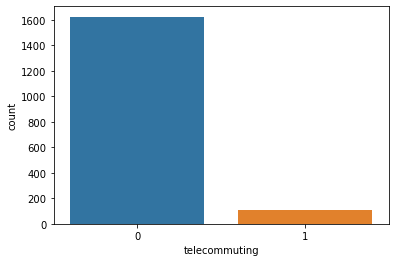

In [51]:
sns.countplot(df['telecommuting'])

In [52]:
df['has_company_logo']

17813    1
17757    0
4578     1
7570     1
7296     1
        ..
2816     0
493      0
17399    0
15472    1
17670    0
Name: has_company_logo, Length: 1732, dtype: int64

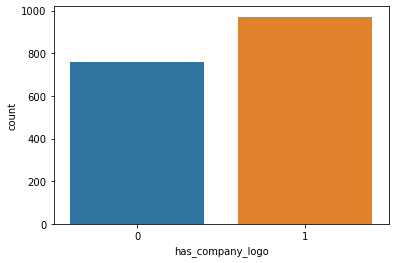

In [53]:
sns.countplot(df['has_company_logo'])

In [54]:
df['has_company_logo'].isna().sum()

0

In [55]:
print("Fraudulent and logo: {0}".format(one[one.has_company_logo == 1].shape[0]/one.shape[0]))

Fraudulent and logo: 0.32678983833718245


In [56]:
print("Non fraudulent and logo: {0}".format(zero[zero.has_company_logo == 1].shape[0]/zero.shape[0]))

Non fraudulent and logo: 0.7944572748267898


###### Most non fraudulent jobs have company logo

In [57]:
print("Fraudulent and no logo: {0}".format(one[one.has_company_logo == 0].shape[0]/one.shape[0]))

Fraudulent and no logo: 0.6732101616628176


In [58]:
print("Non fraudulent and no logo: {0}".format(zero[zero.has_company_logo == 0].shape[0]/zero.shape[0]))

Non fraudulent and no logo: 0.20554272517321015


###### Most fraudulent jobs don't have a company logo

In [59]:
df['has_questions']

17813    0
17757    0
4578     1
7570     1
7296     0
        ..
2816     0
493      0
17399    0
15472    0
17670    0
Name: has_questions, Length: 1732, dtype: int64

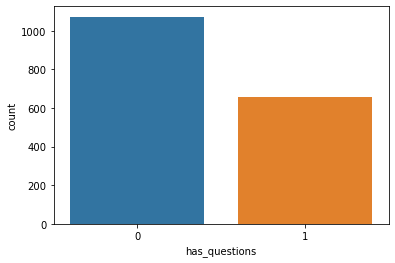

In [60]:
sns.countplot(df['has_questions'])

In [61]:
df['has_questions'].isna().sum()

0

In [62]:
print("Fraudulent and questions: {0}".format(one[one.has_questions == 1].shape[0]/one.shape[0]))

print("Non fraudulent and questions: {0}".format(zero[zero.has_questions == 1].shape[0]/zero.shape[0]))

Fraudulent and questions: 0.28868360277136257
Non fraudulent and questions: 0.4722863741339492


In [63]:
print("Fraudulent and no questions: {0}".format(one[one.has_questions == 0].shape[0]/one.shape[0]))

print("Non fraudulent and no questions: {0}".format(zero[zero.has_questions == 0].shape[0]/zero.shape[0]))

Fraudulent and no questions: 0.7113163972286374
Non fraudulent and no questions: 0.5277136258660509


###### Most fraudulent jobs don't have questions

In [64]:
df['employment_type'].unique()

array(['Full-time', nan, 'Contract', 'Part-time', 'Other', 'Temporary'],
      dtype=object)

In [65]:
df['employment_type'].isna().sum()

400

In [66]:
print(one.employment_type.isna().sum()/one.shape[0])
print(zero.employment_type.isna().sum()/zero.shape[0])

0.27829099307159355
0.1836027713625866


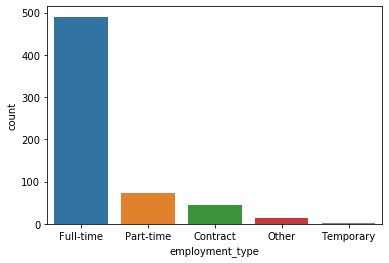

In [67]:
sns.countplot(one.employment_type)

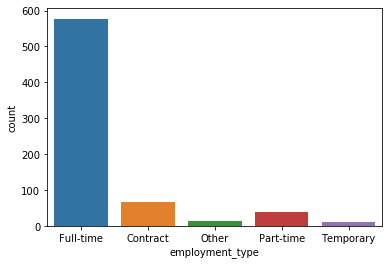

In [68]:
sns.countplot(zero.employment_type)

In [69]:
df['required_experience']

17813         Entry level
17757         Entry level
4578          Entry level
7570       Not Applicable
7296            Associate
               ...       
2816     Mid-Senior level
493           Entry level
17399                 NaN
15472           Associate
17670         Entry level
Name: required_experience, Length: 1732, dtype: object

In [70]:
df['required_experience'].isna().sum()

768

In [71]:
print(one.required_experience.isna().sum()/one.shape[0])
print(zero.required_experience.isna().sum()/zero.shape[0])

0.5023094688221709
0.384526558891455


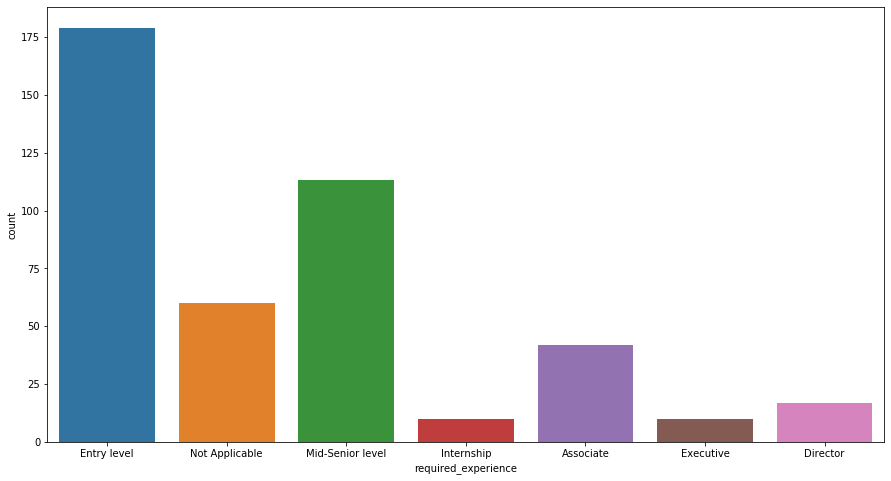

In [72]:
plt.figure(figsize=(15,8))
sns.countplot(one.required_experience)

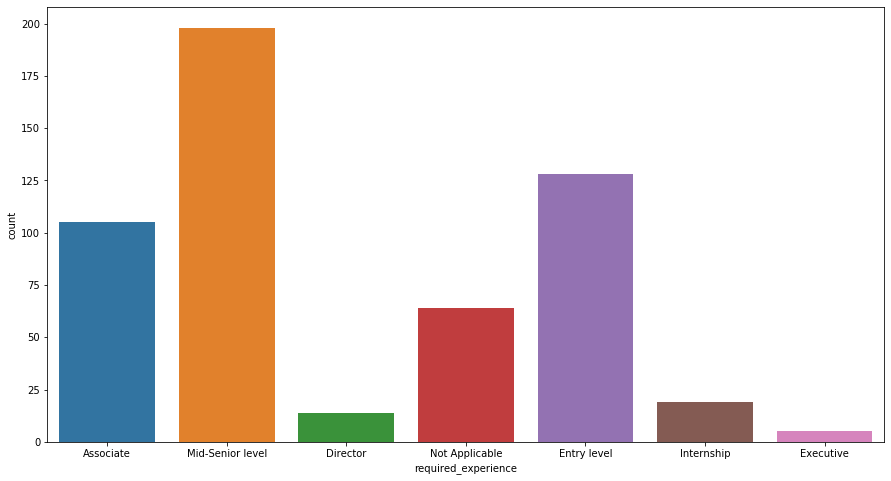

In [73]:
plt.figure(figsize=(15,8))
sns.countplot(zero.required_experience)

###### Mostly "Entry level jobs" are fraudulent

In [74]:
df['required_education']

17813      High School or equivalent
17757                            NaN
4578       High School or equivalent
7570                     Unspecified
7296                             NaN
                    ...             
2816               Bachelor's Degree
493        High School or equivalent
17399                            NaN
15472                            NaN
17670    Some High School Coursework
Name: required_education, Length: 1732, dtype: object

In [75]:
df['required_education'].isna().sum()

850

In [76]:
print(one.required_education.isna().sum()/one.shape[0])
print(zero.required_education.isna().sum()/zero.shape[0])

0.5207852193995381
0.4607390300230947


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

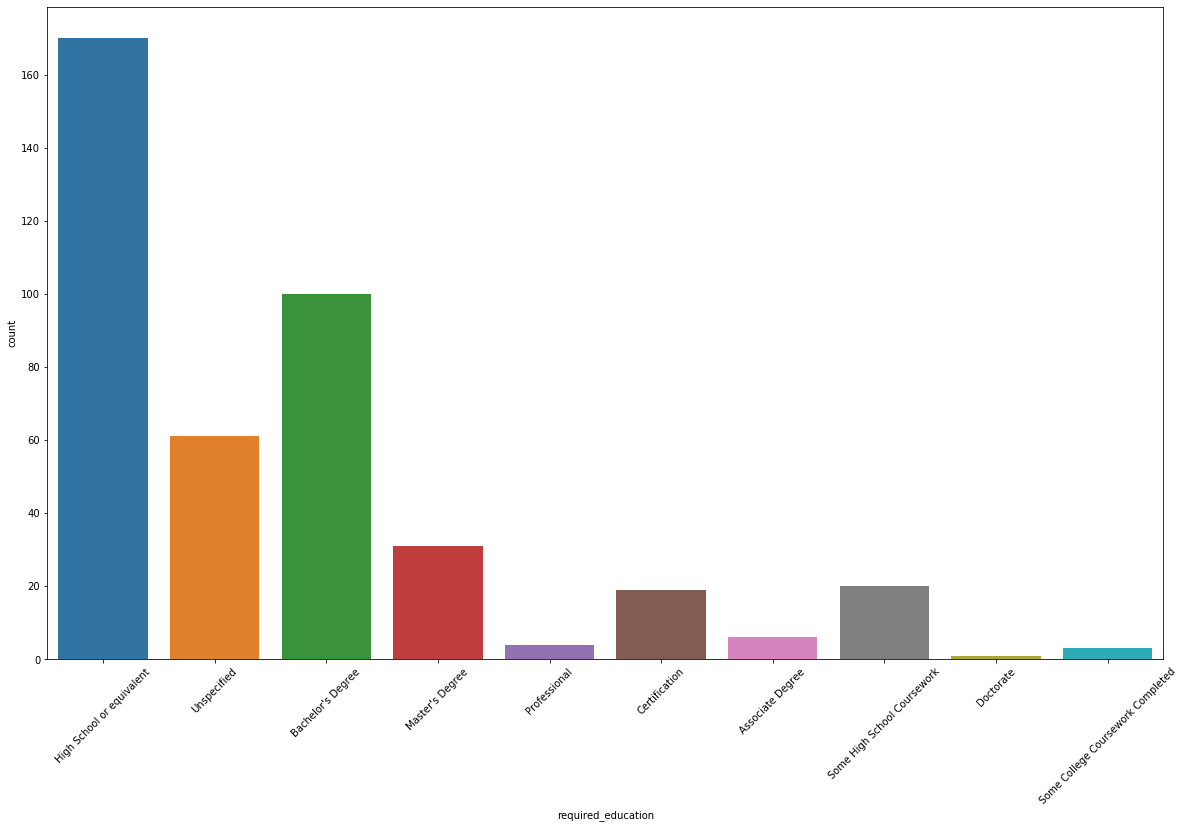

In [77]:
plt.figure(figsize=(20,12))
sns.countplot(one.required_education)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

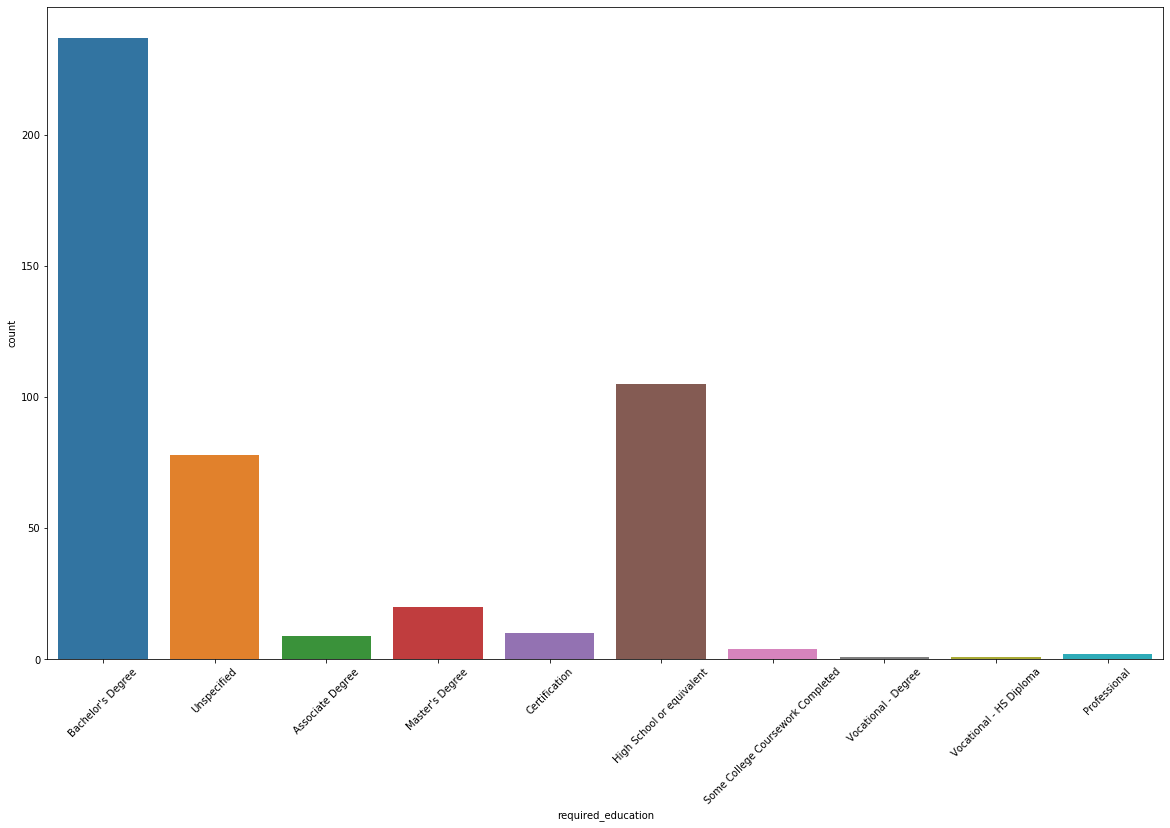

In [78]:
plt.figure(figsize=(20,12))
sns.countplot(zero.required_education)
plt.xticks(rotation=45)

In [79]:
df['industry']

17813                            Real Estate
17757                             Accounting
4578                      Financial Services
7570                        Media Production
7296                       Computer Software
                        ...                 
2816     Information Technology and Services
493                        Computer Software
17399                                    NaN
15472                                    NaN
17670                                    NaN
Name: industry, Length: 1732, dtype: object

In [80]:
df['industry'].isna().sum()

511

In [81]:
print(one.industry.isna().sum()/one.shape[0])
print(zero.industry.isna().sum()/zero.shape[0])

0.31755196304849886
0.27251732101616627


In [82]:
df['function']

17813          Customer Service
17757            Administrative
4578                        NaN
7570              Manufacturing
7296           Customer Service
                  ...          
2816     Information Technology
493              Administrative
17399                       NaN
15472                     Other
17670            Administrative
Name: function, Length: 1732, dtype: object

In [83]:
df['function'].isna().sum()

657

In [84]:
print(one.function.isna().sum()/one.shape[0])
print(zero.function.isna().sum()/zero.shape[0])

0.3891454965357968
0.3695150115473441


### Data Preparation

In [85]:
for col in df.columns:
    nulls = df[col].isna().sum()
    if nulls > 600:
        df = df.drop(columns=[col])

In [86]:
df.shape

(1732, 11)

In [87]:
x = df.location.apply(lambda x: str(x).split(',')[-1])

In [89]:
df.employment_type.unique()

array(['Full-time', nan, 'Contract', 'Part-time', 'Other', 'Temporary'],
      dtype=object)

In [103]:
x = np.array(x)

In [110]:
df.columns

Index(['job_id', 'title', 'location', 'description', 'requirements',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'industry', 'fraudulent'],
      dtype='object')

In [114]:
df2 = df.drop(columns=['job_id','title','location','description','requirements','industry'])

In [117]:
df2 = df2.dropna()

In [119]:
df2 = pd.get_dummies(df2)

In [140]:
df2.head(5)

,telecommuting,has_company_logo,has_questions,fraudulent,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary
17813,1,1,0,1,0,1,0,0,0
17757,0,0,0,1,0,1,0,0,0
4578,0,1,1,1,0,1,0,0,0
7570,0,1,1,1,0,1,0,0,0
7296,0,1,0,0,0,1,0,0,0


### Train and test split

In [154]:
y = df2['fraudulent']
X = df2.drop(columns=['fraudulent'])

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Models

In [156]:
models = []
acc = []

### 1. KNN Classifier

In [157]:
neighbors = [i for i in range(1,11)]

In [158]:
error_rate = []

In [159]:
for neigh in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neigh)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(y_test != pred))
    score = metrics.accuracy_score(y_true=y_test,y_pred=pred)
    models.append("KNN_"+str(neigh))
    acc.append(score)
    print("{0}: {1}".format(neigh,score))

1: 0.6254681647940075
2: 0.7116104868913857
3: 0.6142322097378277
4: 0.6254681647940075
5: 0.6217228464419475
6: 0.6217228464419475
7: 0.6329588014981273
8: 0.6217228464419475
9: 0.6329588014981273
10: 0.6179775280898876


Text(0, 0.5, 'Error Rate')

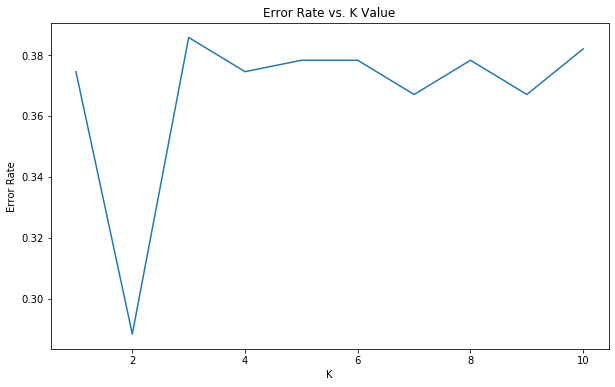

In [160]:
plt.figure(figsize=(10,6))
plt.plot(neighbors,error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### 2. Logistic Regression

In [161]:
clf = LogisticRegression(random_state=0)
model = clf.fit(X_train,y_train)
pred = model.predict(X_test)
models.append("Logistic Regression")
score = metrics.accuracy_score(y_test,pred)
acc.append(score)
print("Logistic Regression: {0}".format(score))

Logistic Regression: 0.7265917602996255


### 3. Support Vector Classifier

In [162]:
penalties = ['l1','l2']
multi_class = ['ovr', 'crammer_singer']

In [163]:
for pen in penalties:
    for cls in multi_class:
        clf = LinearSVC(random_state=0,penalty=pen,multi_class=cls,dual=False)
        model = clf.fit(X_train,y_train)
        pred = model.predict(X_test)
        score = metrics.accuracy_score(y_test,pred)
        models.append("LinearSVC_pen-"+str(pen)+"_cls-"+str(cls))
        acc.append(score)
        print("LinearSVC_pen-"+str(pen)+"_cls-"+str(cls), score)

LinearSVC_pen-l1_cls-ovr 0.7265917602996255
LinearSVC_pen-l1_cls-crammer_singer 0.7265917602996255
LinearSVC_pen-l2_cls-ovr 0.7265917602996255
LinearSVC_pen-l2_cls-crammer_singer 0.7265917602996255


### 4. Support Vector Classifier

In [164]:
c = [0.01, 0.1, 1, 10]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
degrees = [2,3,4,5]

In [165]:
for kern in kernels:
    if kern == 'poly':
        for val in c:
            for deg in degrees:
                clf = SVC(random_state=0,kernel=kern,C=val,degree=deg)
                model = clf.fit(X_train,y_train)
                pred = model.predict(X_test)
                models.append("SVC_"+str(kern)+"_C-"+str(val)+"_deg-"+str(deg))
                score = metrics.accuracy_score(y_test,pred)
                acc.append(score)
                print("SVC_"+str(kern)+"_C-"+str(val)+"_deg-"+str(deg),score)
    else:
        for val in c:
            clf = SVC(random_state=0,kernel=kern,C=val)
            model = clf.fit(X_train,y_train)
            pred = model.predict(X_test)
            models.append("SVC_"+str(kern)+"_C-"+str(val))
            score = metrics.accuracy_score(y_test,pred)
            acc.append(score)
            print("SVC_"+str(kern)+"_C-"+str(val),score)

SVC_linear_C-0.01 0.7265917602996255
SVC_linear_C-0.1 0.7265917602996255
SVC_linear_C-1 0.7265917602996255
SVC_linear_C-10 0.7265917602996255
SVC_poly_C-0.01_deg-2 0.7153558052434457
SVC_poly_C-0.01_deg-3 0.704119850187266
SVC_poly_C-0.01_deg-4 0.704119850187266
SVC_poly_C-0.01_deg-5 0.704119850187266
SVC_poly_C-0.1_deg-2 0.7265917602996255
SVC_poly_C-0.1_deg-3 0.7265917602996255
SVC_poly_C-0.1_deg-4 0.7153558052434457
SVC_poly_C-0.1_deg-5 0.7153558052434457
SVC_poly_C-1_deg-2 0.7265917602996255
SVC_poly_C-1_deg-3 0.7265917602996255
SVC_poly_C-1_deg-4 0.7265917602996255
SVC_poly_C-1_deg-5 0.7265917602996255
SVC_poly_C-10_deg-2 0.7265917602996255
SVC_poly_C-10_deg-3 0.7265917602996255
SVC_poly_C-10_deg-4 0.7265917602996255
SVC_poly_C-10_deg-5 0.7265917602996255
SVC_rbf_C-0.01 0.700374531835206
SVC_rbf_C-0.1 0.7265917602996255
SVC_rbf_C-1 0.7265917602996255
SVC_rbf_C-10 0.7265917602996255
SVC_sigmoid_C-0.01 0.6179775280898876
SVC_sigmoid_C-0.1 0.6441947565543071
SVC_sigmoid_C-1 0.6367041

### 5. Decision Tree Classifier

In [166]:
criterion = ['gini','entropy']
max_depths = [i for i in range(1,9)]

In [167]:
for cri in criterion:
    for max_dep in max_depths:
        clf = DecisionTreeClassifier(criterion=cri,max_depth=max_dep)
        model = clf.fit(X_train,y_train)
        pred = model.predict(X_test)
        models.append("DecisionTree_cri-"+str(cri)+"_depth-"+str(max_dep))
        score = metrics.accuracy_score(y_test,pred)
        acc.append(score)
        print("DecisionTree_cri-"+str(cri)+"_depth-"+str(max_dep),score)

DecisionTree_cri-gini_depth-1 0.7265917602996255
DecisionTree_cri-gini_depth-2 0.7265917602996255
DecisionTree_cri-gini_depth-3 0.7265917602996255
DecisionTree_cri-gini_depth-4 0.7265917602996255
DecisionTree_cri-gini_depth-5 0.7303370786516854
DecisionTree_cri-gini_depth-6 0.7265917602996255
DecisionTree_cri-gini_depth-7 0.7265917602996255
DecisionTree_cri-gini_depth-8 0.7265917602996255
DecisionTree_cri-entropy_depth-1 0.7265917602996255
DecisionTree_cri-entropy_depth-2 0.7265917602996255
DecisionTree_cri-entropy_depth-3 0.7265917602996255
DecisionTree_cri-entropy_depth-4 0.7265917602996255
DecisionTree_cri-entropy_depth-5 0.7265917602996255
DecisionTree_cri-entropy_depth-6 0.7228464419475655
DecisionTree_cri-entropy_depth-7 0.7265917602996255
DecisionTree_cri-entropy_depth-8 0.7265917602996255


## Comparing Models

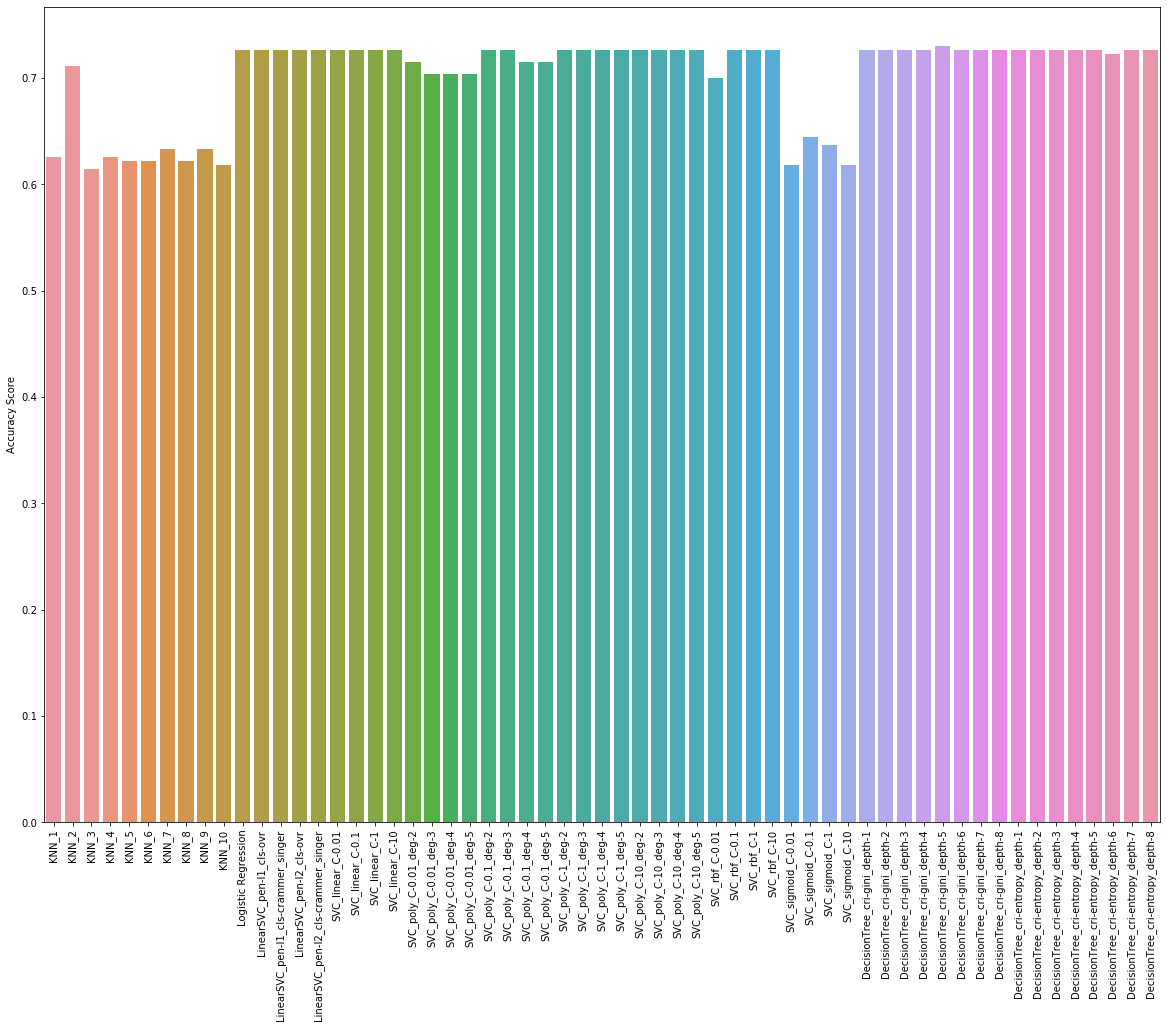

In [173]:
plt.figure(figsize=(20,15))
sns.barplot(models,acc)
plt.ylabel("Accuracy Score")
plt.xticks(rotation=90)
plt.show()

In [175]:
df_models = pd.DataFrame({'model':models,'accuracy':acc})

In [177]:
df_models[df_models.accuracy == max(acc)]

,model,accuracy
47,DecisionTree_cri-gini_depth-5,0.730337


# Best model is Decision Tree Classifier with gini as the 'criteria' and 5 as maximum tree depth